# 2. Ward-Level Comparative Analysis
## Objective: Identify which wards face the greatest challenges or have the best potential for water storage.

### Method:
Rank wards by average groundwater level each year.
Identify wards with consistent drops or high variability in levels.
### Insights:
Pinpoint wards most affected by water scarcity or potential flooding.
Highlight wards with relatively stable groundwater levels as benchmarks.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
file_path = "chennai-ground-water-levels-2023.csv"  # Replace with your file path
df = pd.read_csv(file_path)

In [3]:
df.head()

,S.No.,Area No.,Dept No.,Location,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1.0,I,1.0,Kathivakkam,1.48,1.520,1.462,1.50,1.53,1.554,1.688,1.599,1.610,1.53,1.29,1.38
1,2.0,I,2.0,Kathivakkam,3.26,3.293,3.310,3.36,3.36,3.382,3.416,3.459,3.470,3.48,3.35,3.268
2,3.0,I,3.0,Ernavoor,2.01,2.236,2.244,2.24,2.14,2.166,2.231,2.51,2.264,2.24,1.82,1.91
3,4.0,I,4.0,Sadaiyankuppam,3.67,3.745,3.661,3.66,3.65,3.638,3.808,4.01,3.646,3.67,3.27,3.125
4,5.0,I,5.0,Kamadhenu Nagar,3.45,3.492,3.439,3.31,3.41,3.151,3.499,3.28,3.393,3.2,3.07,3.157


In [4]:
# Columns for monthly groundwater levels
monthly_columns = ["Jan ", "Feb", "Mar", "Apr ", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]


In [5]:
# Ensure the monthly columns are numeric
df[monthly_columns] = df[monthly_columns].apply(pd.to_numeric, errors='coerce')

In [6]:
# Step 1: Rank Wards by Average Groundwater Level
# Calculate yearly average for each ward
df["Yearly Average"] = df[monthly_columns].mean(axis=1)

# Rank wards based on yearly average
df["Rank"] = df["Yearly Average"].rank(ascending=False)

In [7]:
# Step 2: Identify Wards with Consistent Drops or High Variability
# Calculate standard deviation (variability) across months for each ward
df["Variability"] = df[monthly_columns].std(axis=1)

# Identify wards with consistent drops (negative trends)
df["Trend"] = df[monthly_columns].apply(lambda x: "Declining" if x.iloc[-1] < x.iloc[0] else "Stable/Rising", axis=1)


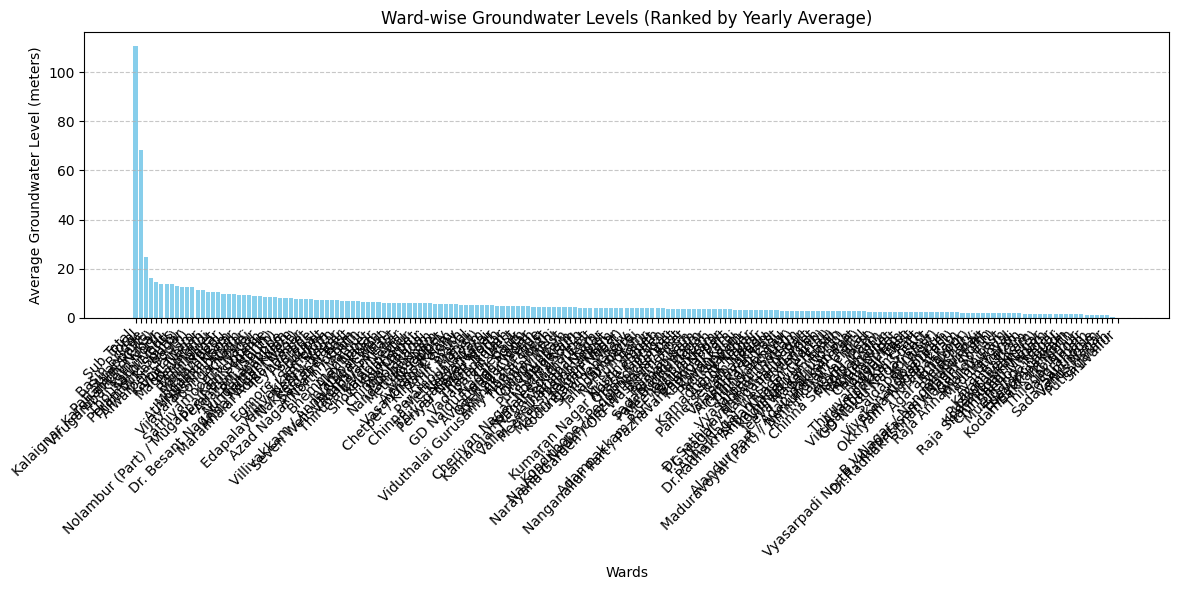

In [8]:
# Step 3: Visualize Results
# Bar plot: Wards ranked by groundwater level
plt.figure(figsize=(12, 6))
df_sorted = df.sort_values("Yearly Average", ascending=False)
plt.bar(df_sorted["Location"], df_sorted["Yearly Average"], color="skyblue")
plt.title("Ward-wise Groundwater Levels (Ranked by Yearly Average)")
plt.xlabel("Wards")
plt.ylabel("Average Groundwater Level (meters)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [9]:
# Step 4: Display Key Insights
# Print ranked wards with variability and trend
print("Wards Ranked by Groundwater Levels:")
print(df[["Location", "Yearly Average", "Rank", "Variability", "Trend"]])

Wards Ranked by Groundwater Levels:
             Location  Yearly Average   Rank  Variability          Trend
0         Kathivakkam        1.511917  219.0     0.104881      Declining
1         Kathivakkam        3.367333  143.0     0.076769  Stable/Rising
2            Ernavoor        2.167583  197.0     0.181993      Declining
3      Sadaiyankuppam        3.629417  134.0     0.229567      Declining
4     Kamadhenu Nagar        3.320917  147.0     0.147659      Declining
..                ...             ...    ...          ...            ...
227       Semmenchery        3.961333  116.0     1.265508      Declining
228         Sub Total       32.677667   14.0     6.791164      Declining
229           Average        3.675243  130.0     0.649573      Declining
230             Total       68.321155    7.0    12.565532      Declining
231  Over all Average        4.554744   99.0     0.837702      Declining

[232 rows x 5 columns]


In [11]:
# Highlight wards with high variability or declining trends
high_variability = df[df["Variability"] > df["Variability"].mean()]
declining_trends = df[df["Trend"] == "Declining"]
print("\nWards with High Variability in Groundwater Levels:")
print(high_variability[["Location", "Yearly Average", "Variability"]])

print("\nWards with Declining Trends in Groundwater Levels:")
print(declining_trends[["Location", "Yearly Average", "Trend"]])


Wards with High Variability in Groundwater Levels:
                        Location  Yearly Average  Variability
14                     Sub Total       47.650583     4.816699
23                     Sub Total       24.222500     4.075551
27                    Surappattu       16.295917     6.589309
28                    Kathirvedu       13.663667     4.599088
29                    Madhavaram       10.488000     3.770385
33                    Alex Nagar        6.315833     2.688240
34                    Moolakadai        5.885000     2.405540
35                   Kalpalaiyam       11.451833     7.072919
37                     Sub Total       89.890917    25.510330
38                       Average        7.490910     2.125861
54                     Sub Total       54.909083     9.768544
68              Egmore / Pudupet        7.422250     2.538554
71                     Sub Total       86.499917    16.690194
77                       Sembium        7.217167     2.131475
88                

In [12]:
import pandas as pd

# Set Pandas options to display all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# Print all rows of the declining trends DataFrame
print("\nWards with Declining Trends in Groundwater Levels:")
print(declining_trends[["Location", "Yearly Average", "Trend"]])

# Reset Pandas options (optional)
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')



Wards with Declining Trends in Groundwater Levels:
                                      Location  Yearly Average      Trend
0                                  Kathivakkam        1.511917  Declining
2                                     Ernavoor        2.167583  Declining
3                               Sadaiyankuppam        3.629417  Declining
4                              Kamadhenu Nagar        3.320917  Declining
5                              Murugappa Nagar        1.554417  Declining
6                         Raja Shanmugam Nagar        1.649250  Declining
7                                  Gandhinagar        3.766750  Declining
8                                 Amsa Thottam        6.747333  Declining
9                         Chinna Mettupalaiyam        5.153167  Declining
10                                  Ondikuppam        4.340917  Declining
11                                  Sathankadu        3.077250  Declining
12                              Thilagar Nagar        1.3794

## Explanation of Code
### Data Cleaning:

Converts monthly columns to numeric and handles non-numeric values.
### Ranking Wards:

Calculates the yearly average groundwater level for each ward.
Assigns ranks to wards based on the average levels (highest levels ranked first).
### Variability Analysis:

Calculates the standard deviation of monthly levels to measure variability.
### Trend Analysis:

Compares the first and last monthly values to classify wards as Declining or Stable/Rising.
### Visualization:

Creates a bar chart to show ward rankings based on yearly averages.
### Insights:

Prints ranked wards along with their variability and trends.
Highlights wards with high variability or declining trends for focused interventions.
## Output
### Ward Ranking Bar Chart:

Displays wards ranked by their average groundwater levels.
### Data Table:

Lists wards with their yearly averages, ranks, variability, and trends.
### Key Insights:

Wards with the highest variability or declining trends are identified for priority action.

------

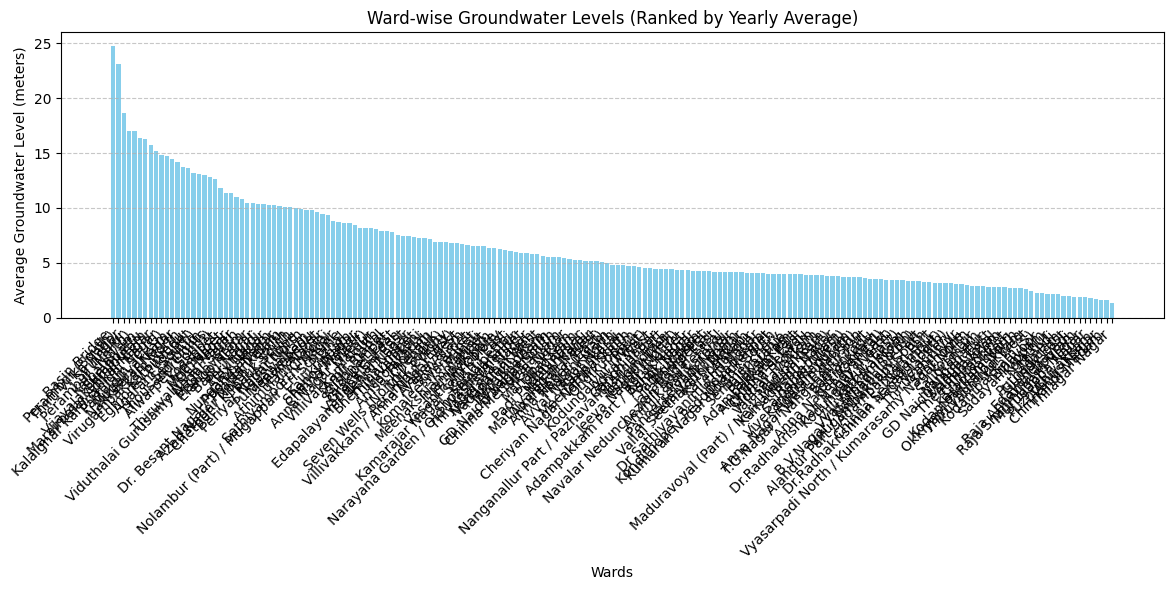


Wards Ranked by Groundwater Levels:
            Location  Year  Yearly Average   Rank  Variability          Trend
0        Kathivakkam  2021        1.788182  189.0     0.174495      Declining
1        Kathivakkam  2021        3.213250  149.0     0.452457      Declining
2           Ernavoor  2021        2.277083  176.0     0.463339      Declining
3     Sadaiyankuppam  2021        3.478167  139.0     0.523349      Declining
4    Kamadhenu Nagar  2021        3.776333  122.0     0.651943      Declining
..               ...   ...             ...    ...          ...            ...
195      Injampakkam  2024        5.663333   44.0     0.366379  Stable/Rising
196       Karapakkam  2024        2.196667  163.0     0.674858  Stable/Rising
197  Shozhinganallur  2024        5.630000   46.0     1.048427  Stable/Rising
198          Uthandi  2024        1.326667  185.0     0.462313  Stable/Rising
199      Semmenchery  2024        3.326667  115.0     0.447474  Stable/Rising

[800 rows x 6 columns]

Wa

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# File paths for 2021-2024
file_path_2021 = "./dataset/chennai-ground-water-levels-2021.csv"
file_path_2022 = "./dataset/chennai-ground-water-levels-2022.csv"
file_path_2023 = "./dataset/chennai-ground-water-levels-2023.csv"
file_path_2024 = "./dataset/chennai-ground-water-levels-2024.csv"

# Load datasets
df_2021 = pd.read_csv(file_path_2021)
df_2022 = pd.read_csv(file_path_2022)
df_2023 = pd.read_csv(file_path_2023)
df_2024 = pd.read_csv(file_path_2024)

# List of monthly columns
monthly_columns = ["Jan ", "Feb", "Mar", "Apr ", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Data Preparation: Ensure all datasets have necessary columns
def prepare_data(df, year=None):
    if year == 2024:
        df[monthly_columns[3:]] = np.nan  # Set Apr-Dec to NaN for 2024
    df[monthly_columns] = df[monthly_columns].apply(pd.to_numeric, errors='coerce')
    df["Yearly Average"] = df[monthly_columns].mean(axis=1)
    return df

# Apply preparation function
df_2021 = prepare_data(df_2021, 2021)
df_2022 = prepare_data(df_2022, 2022)
df_2023 = prepare_data(df_2023, 2023)
df_2024 = prepare_data(df_2024, 2024)

# Add Year Column
df_2021["Year"] = 2021
df_2022["Year"] = 2022
df_2023["Year"] = 2023
df_2024["Year"] = 2024

# Combine all datasets
df_all_years = pd.concat([df_2021, df_2022, df_2023, df_2024])

# Step 1: Rank Wards by Average Groundwater Level
df_all_years["Rank"] = df_all_years.groupby("Year")["Yearly Average"].rank(ascending=False)

# Step 2: Identify Wards with Consistent Drops or High Variability
df_all_years["Variability"] = df_all_years[monthly_columns].std(axis=1)
df_all_years["Trend"] = df_all_years[monthly_columns].apply(lambda x: "Declining" if x.iloc[-1] < x.iloc[0] else "Stable/Rising", axis=1)

# Create directory for saving plots
output_dir = "ward level comp"
os.makedirs(output_dir, exist_ok=True)

# Step 3: Split Locations into Groups of 6
locations = df_all_years["Location"].unique()
num_plots = int(np.ceil(len(locations) / 6))  # Calculate number of plots needed

# Step 4: Loop through each year and generate plots
years = [2021, 2022, 2023, 2024]
for year in years:
    df_year = df_all_years[df_all_years["Year"] == year]  # Filter data for specific year

    for i in range(num_plots):
        plt.figure(figsize=(12, 6))

        start_idx = i * 6
        end_idx = start_idx + 6
        selected_locations = locations[start_idx:end_idx]  # Select 6 locations per plot

        for location in selected_locations:
            subset = df_year[df_year["Location"] == location]
            
            if not subset.empty:  # Ensure the location exists in this year's data
                values = subset[monthly_columns].iloc[0].values  
                plt.plot(monthly_columns, values, marker='o', label=location)

        # Prepare plot title and filename
        plot_title = f"Monthly Groundwater Levels for {year} (Wards {start_idx + 1}-{min(end_idx, len(locations))})"
        plt.xlabel("Months")
        plt.ylabel("Groundwater Level (m)")
        plt.title(plot_title)
        plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Wards")
        plt.grid()
        plt.tight_layout()

        # Save plot
        sanitized_title = plot_title.replace(" ", "_").replace(":", "").replace("(", "").replace(")", "")
        plt.savefig(os.path.join(output_dir, f"{sanitized_title}.png"))
        plt.close()

# Step 5: Visualize Wards Ranked by Groundwater Levels
plt.figure(figsize=(12, 6))
df_sorted = df_all_years.sort_values("Yearly Average", ascending=False)
plt.bar(df_sorted["Location"], df_sorted["Yearly Average"], color="skyblue")
plt.title("Ward-wise Groundwater Levels (Ranked by Yearly Average)")
plt.xlabel("Wards")
plt.ylabel("Average Groundwater Level (meters)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Ward-wise_Groundwater_Levels.png"))
plt.show()

# Step 6: Display Insights
high_variability = df_all_years[df_all_years["Variability"] > df_all_years["Variability"].mean()]
declining_trends = df_all_years[df_all_years["Trend"] == "Declining"]

# Print ward rankings
print("\nWards Ranked by Groundwater Levels:")
print(df_all_years[["Location", "Year", "Yearly Average", "Rank", "Variability", "Trend"]])

# Print high variability wards
print("\nWards with High Variability in Groundwater Levels:")
print(high_variability[["Location", "Yearly Average", "Variability"]])

# Print wards with declining trends
print("\nWards with Declining Trends in Groundwater Levels:")
print(declining_trends[["Location", "Yearly Average", "Trend"]])
